In [1]:
%matplotlib notebook

import json
import numpy as np
import numpy.random as npr
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib.ticker as mpt

from ast import literal_eval

In [2]:
BURN_IN = 20

base_parameters = {
    'k_a': 0.002,
    'k_d': 0.1,
    'mu': 3.0,
    'kappa': 1.0,
    'gamma': 0.04,
    'diffusion': 0.6,
    'time_step': 0.1,
    'cell_radius': 6.0,
    'nucleus_radius': 2.5,
}

def log_value(p, name=None):
    return (np.log10(base_parameters[name]) if name else 0) + p * np.log10(2)

def exp_value(p, name=None):
    return (p - (np.log10(base_parameters[name]) if name else 0))/np.log10(2)


def get_data(filename):
    with open(filename, 'r') as f:
        data = {model: {literal_eval(k): v for k, v in lklh.items()}
                for model, lklh in json.load(f).items()}
    return data

<IPython.core.display.Javascript object>


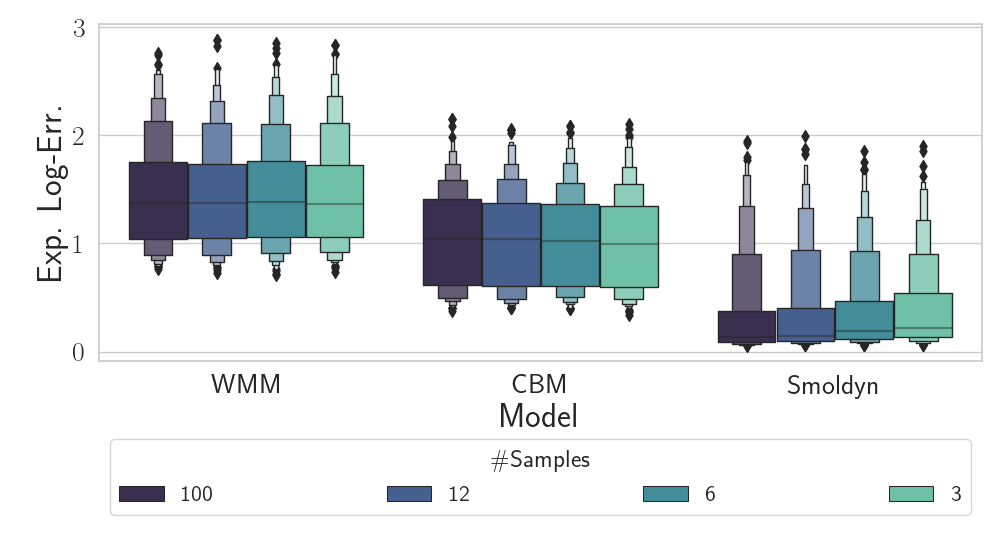

In [7]:
params = {
    'legend.fontsize': 16,
    'legend.title_fontsize': 18,
    'figure.figsize': (10, 5.5),
    'figure.titlesize': 28,
    'axes.labelsize': 24,
    'axes.titlesize':24,
    'xtick.labelsize':20,
    'ytick.labelsize':20,
    'text.usetex':True,
    'figure.autolayout':False,
}

import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid")
plt.style.use('tableau-colorblind10')

plt.rcParams.update(params)

fig, ax = plt.subplots()

solvers = ['WMM', 'CBM', 'smoldyn']

traj = 'h'
dist = 'kg'
species = 'all'

labels = [
    (solver, tsamp)
    for solver in solvers
    for tsamp in ['h', '12l', '6l', 'l']
]

n_tsamp = {
    'h': '100',
    '12l': '12',
    '6l': '6',
    'l': '3',
}

expvalues = [
        (v, solver if solver != 'smoldyn' else 'Smoldyn', n_tsamp[tsamp])
    for solver, tsamp in labels
    for (_, _, k_d), v in get_data(
            '../{dist}/logexpvalue_{dist}_{species}_{traj}{tsamp}.json'.format(
                dist=dist, species=species, traj=traj, tsamp=tsamp)
        )[solver].items() if k_d == 0
]

df_expvalues = pd.DataFrame(expvalues, columns=['expvalue', 'solver', 'tsamp'])

sns.boxenplot(ax=ax, data=df_expvalues, y='expvalue', hue='tsamp', x='solver', palette='mako')

ax.legend(title="\#Samples", bbox_to_anchor=(0, -0.2, 1, 0), mode="expand", ncol=4)

#ax.set_yscale('log')
#ax.set_ylim(0.1, 10)

ax.set_ylabel("Exp. Log-Err.")
ax.set_xlabel("Model")

#fig.suptitle("Decreasing the number of time samples")      
plt.grid(which='minor')
        
plt.tight_layout()
plt.savefig("facs.pdf", dpi=300, bbox_inches='tight')

<IPython.core.display.Javascript object>


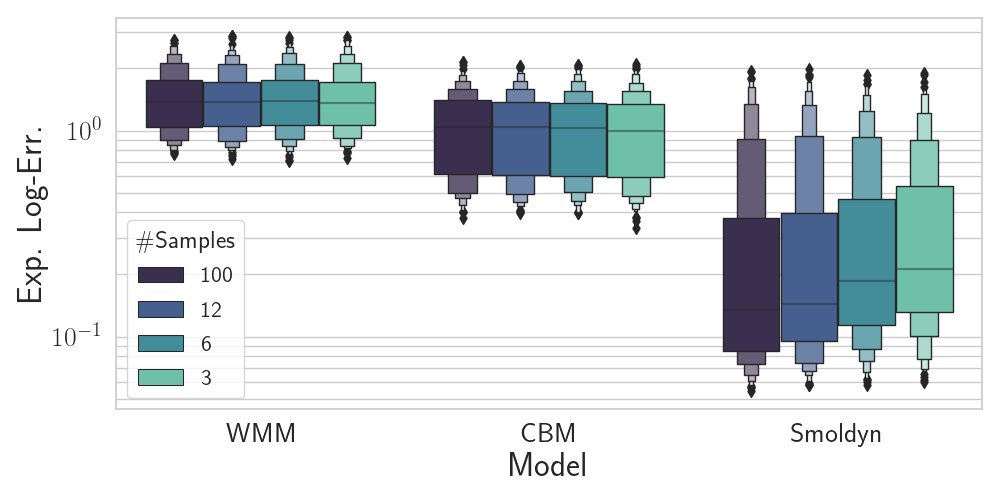

In [4]:
params = {
    'legend.fontsize': 16,
    'legend.title_fontsize': 18,
    'figure.figsize': (10, 5),
    'figure.titlesize': 28,
    'axes.labelsize': 24,
    'axes.titlesize':24,
    'xtick.labelsize':20,
    'ytick.labelsize':20,
    'text.usetex':True,
    'figure.autolayout':False,
}

import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid")
plt.style.use('tableau-colorblind10')

plt.rcParams.update(params)

fig, ax = plt.subplots()

solvers = ['WMM', 'CBM', 'smoldyn']

traj = 'h'
dist = 'kg'
species = 'all'

labels = [
    (solver, tsamp)
    for solver in solvers
    for tsamp in ['h', '12l', '6l', 'l']
]

n_tsamp = {
    'h': '100',
    '12l': '12',
    '6l': '6',
    'l': '3',
}

expvalues = [
        (v, solver if solver != 'smoldyn' else 'Smoldyn', n_tsamp[tsamp])
    for solver, tsamp in labels
    for (_, _, k_d), v in get_data(
            '../{dist}/logexpvalue_{dist}_{species}_{traj}{tsamp}.json'.format(
                dist=dist, species=species, traj=traj, tsamp=tsamp)
        )[solver].items() if k_d == 0
]

df_expvalues = pd.DataFrame(expvalues, columns=['expvalue', 'solver', 'tsamp'])

sns.boxenplot(ax=ax, data=df_expvalues, y='expvalue', hue='tsamp', x='solver', palette='mako')

ax.legend(title="\#Samples")

ax.set_yscale('log')
#ax.set_ylim(0.1, 10)

ax.set_ylabel("Exp. Log-Err.")
ax.set_xlabel("Model")

#fig.suptitle("Decreasing the number of time samples")      
plt.grid(which='minor')
        
plt.tight_layout()
plt.savefig("logfacs.pdf", dpi=300, bbox_inches='tight')